### Importación de librerías

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [289]:
dataframe = pd.read_csv(r"data.csv",sep=';')
dataframe.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


### Resumen estadístico de los datos

In [290]:

dataframe.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Visualización de los datos

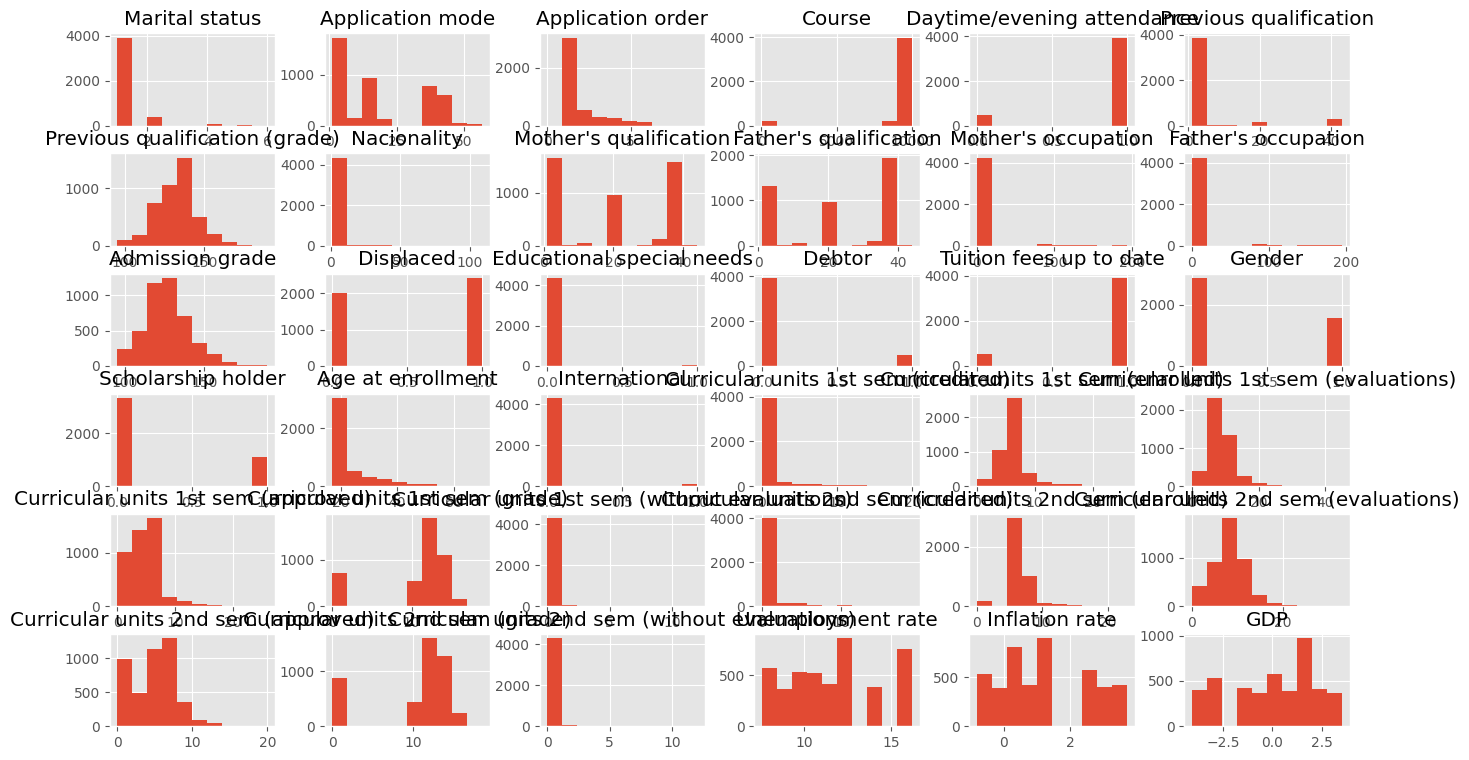

In [291]:

dataframe.hist()
plt.show()

### Preparar las entradas

In [292]:
X = dataframe.drop(columns=['Target'])
y = dataframe['Target']

### Codificar variables categóricas

In [293]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

### Separar datos para el entrenamiento y para la prueba del modelo

In [294]:
# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


### Escalar datos

In [295]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Aplicar algoritmo

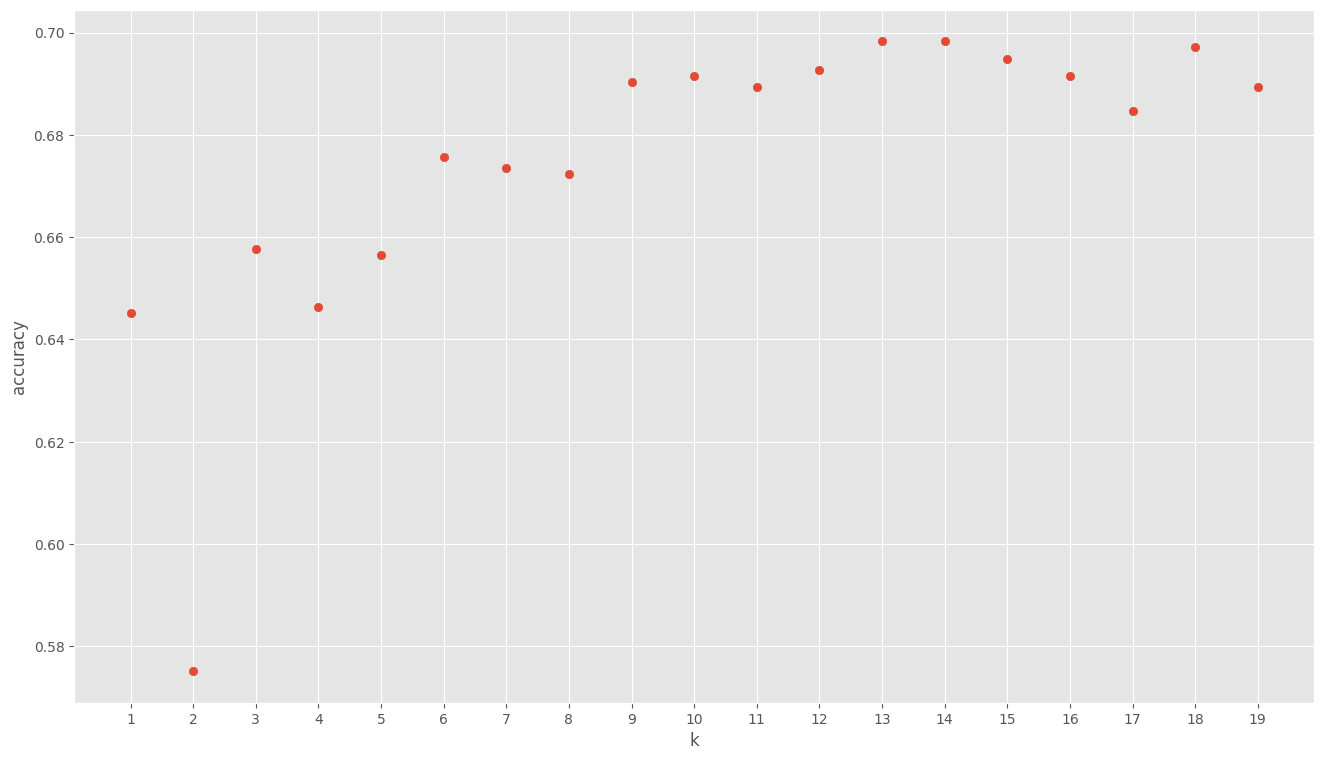

Mejor valor de k: 13 con accuracy: 0.70


In [296]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Buscar el mejor valor de k
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Visualizar resultados
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(k_range)
plt.show()

# Obtener el mejor valor de k
best_k = k_range[scores.index(max(scores))]
print(f"Mejor valor de k: {best_k} con accuracy: {max(scores):.2f}")


In [297]:
from sklearn.neighbors import KNeighborsClassifier

 
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.70


### Ver la precisión del modelo

Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos

In [298]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[195  15  74]
 [ 35  32  84]
 [ 23  36 391]]
              precision    recall  f1-score   support

     Dropout       0.77      0.69      0.73       284
    Enrolled       0.39      0.21      0.27       151
    Graduate       0.71      0.87      0.78       450

    accuracy                           0.70       885
   macro avg       0.62      0.59      0.59       885
weighted avg       0.68      0.70      0.68       885



### GRÁFICO

In [299]:
"""
# Select only the relevant features for training and testing
X1 = dataframe[['Previous qualification (grade)', 'Admission grade']].copy()

# Encode the target variable (Graduate, Dropout, Enrolled)
le = LabelEncoder()
y = le.fit_transform(dataframe['Target'])  # Now y will be 0, 1, or 2

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=0)

# Scale the numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Define the classifier with the best value of k
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train_scaled, y_train)

# Visualization in 2D
h = .02
x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)  # Encode string labels into numerical values
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00AA00'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Encode the target labels into numerical values for the 'c' argument
y_train_encoded = le.transform(y_train)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_encoded, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Visualización 2D k-NN (k = {best_k})")
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')

labels = le.classes_
legend_handles = [mpatches.Patch(color=cmap_bold(i), label=label) for i, label in enumerate(labels)]
plt.legend(handles=legend_handles, title="Clase")

plt.show()
"""


'\n# Select only the relevant features for training and testing\nX1 = dataframe[[\'Previous qualification (grade)\', \'Admission grade\']].copy()\n\n# Encode the target variable (Graduate, Dropout, Enrolled)\nle = LabelEncoder()\ny = le.fit_transform(dataframe[\'Target\'])  # Now y will be 0, 1, or 2\n\n# Split the data into training and testing sets\nX_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=0)\n\n# Scale the numerical features\nscaler = MinMaxScaler()\nX_train_scaled = scaler.fit_transform(X_train1)\nX_test_scaled = scaler.transform(X_test1)\n\n# Define the classifier with the best value of k\nclf = KNeighborsClassifier(n_neighbors=best_k)\nclf.fit(X_train_scaled, y_train)\n\n# Visualization in 2D\nh = .02\nx_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1\ny_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                

# PREDICCIONES

In [300]:
import pandas as pd

# Cargar nuevo dataset
nuevo_df = pd.read_csv("nuevo_estudiante.csv", sep=";")



#Hacer prediccion del nuevo data set usando X y no X1
#X_nuevo va a ser todas las columnas menos la de target

X_nuevo = nuevo_df.drop(columns=['Target'])  # Drop the target column
X_nuevo = scaler.transform(X_nuevo)  # Scale the features
y_nuevo = nuevo_df['Target']  # Extract the target column

# Make predictions
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)
# Predecir las clases para el nuevo dataset

predicciones_nuevo = clf.predict(X_nuevo)
# Ensure the LabelEncoder is fitted with all possible labels only once at the beginning
if not hasattr(le, 'classes_') or len(le.classes_) == 0:
    le.fit(y.unique())  # Fit the LabelEncoder with the original labels


#imprimir: el estudiante 1, el estudiante 2, etc. es con probabilidad de x graduarse, x de abandonar, x de inscribirse
for i, pred in enumerate(predicciones_nuevo):
    prob = clf.predict_proba(X_nuevo)[i]
    print(f"El estudiante {i+1} es {prob[0]:.2f} que se gradúe, {prob[1]:.2f} que abandone y {prob[2]:.2f} que se inscriba.")



El estudiante 1 es 0.15 que se gradúe, 0.00 que abandone y 0.85 que se inscriba.
El estudiante 2 es 0.15 que se gradúe, 0.00 que abandone y 0.85 que se inscriba.
El estudiante 3 es 0.08 que se gradúe, 0.00 que abandone y 0.92 que se inscriba.
El estudiante 4 es 0.23 que se gradúe, 0.00 que abandone y 0.77 que se inscriba.
El estudiante 5 es 0.23 que se gradúe, 0.08 que abandone y 0.69 que se inscriba.


In [301]:
print(nuevo_df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s